# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data
data = pd.read_csv('/content/drive/MyDrive/Data Science- GL/3- Supervised Learning- Foundations/Project 3/used_device_data.csv') 

## Data Overview

- Observations
- Sanity checks

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [ ]:
#to display the first few rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# to Display the last few rows of the dataset
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
# to Check the shape of the dataset
data.shape

(3454, 15)

###Observation:
- There are 3454 rows and 15 columns in the data

In [ ]:
# to get info about the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

##### Observations:
* There are a total of 3454 entries/observations and 15 columns/features in the dataset.

* There is 3 different data types:
 The release_year and days_used columns are of int64 data type. There are four object type columns and the rest are all floats.

 - int64(2) 

 - float64(9) 

 - object(4) 

* A memory usage of 404.9+ KB.

- From the non-null count, we can see that some columns have missing values as their total count does not total up to the total number of rows in the data frame

In [ ]:
# to get Statistical summary of the dataset
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [ ]:
# to Check for duplicate values
data.duplicated().sum()

0

#### Observations:
* There are no duplicated values.

In [ ]:
#to check for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### Observations:
- main_camera_mp column has the most missing values that total up to 179.
- int_memory and ram have the same missing number of missing values
- The target variable does not have missing values which is a good thing. Meaning we shall not lose any data by dropping rows.

PS: We will go ahead and check if there is a relationship between the missing values in the different columns. This Information will provide a basis for missing values imputation during data preprocessing

In [ ]:
# to check data types
data.dtypes

brand_name                object
os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object

In [ ]:
# Converting object data types to category
category_col = data.select_dtypes(exclude=np.number).columns.tolist()
data[category_col] = data[category_col].astype("category")

In [ ]:
# checking to see that all columns are of the right data types (The object type must be changed categorically. If we do not do this, the object type may detect the string and cause errors in the data.)
data.dtypes

brand_name               category
os                       category
screen_size               float64
4g                       category
5g                       category
main_camera_mp            float64
selfie_camera_mp          float64
int_memory                float64
ram                       float64
battery                   float64
weight                    float64
release_year                int64
days_used                   int64
normalized_used_price     float64
normalized_new_price      float64
dtype: object

#### Observation:
- The object type must be changed categorically. If we do not do this, the object type may detect the string and cause errors in the data.


In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

In [ ]:
# Let's look at the statistical summary of the data

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

1. Normalized Used Price

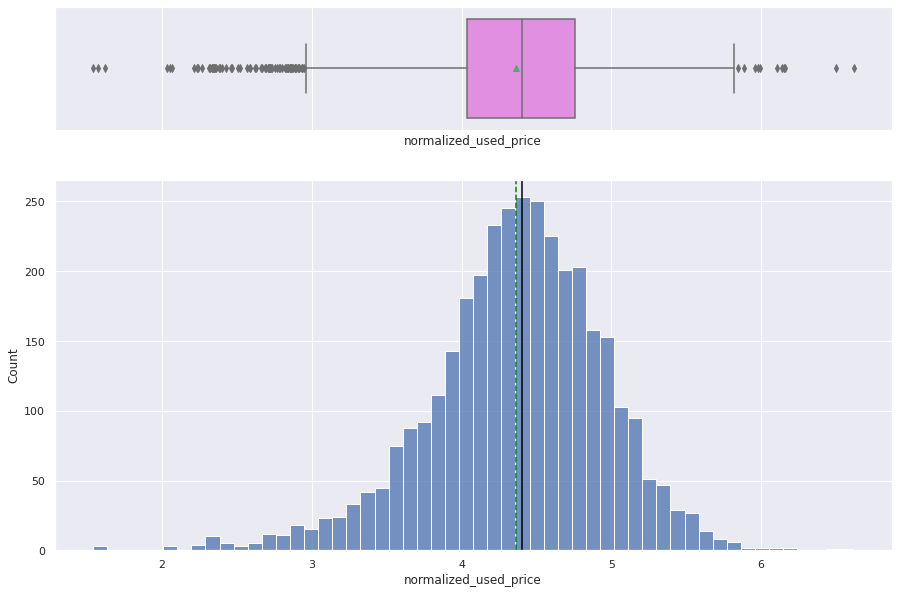

In [ ]:
histogram_boxplot(df, "normalized_used_price")

###Observations:
- The price of used phones approximately follows a normal distribution
- From the box_plot we can see that there are outliers

2. Normalized price of New devices

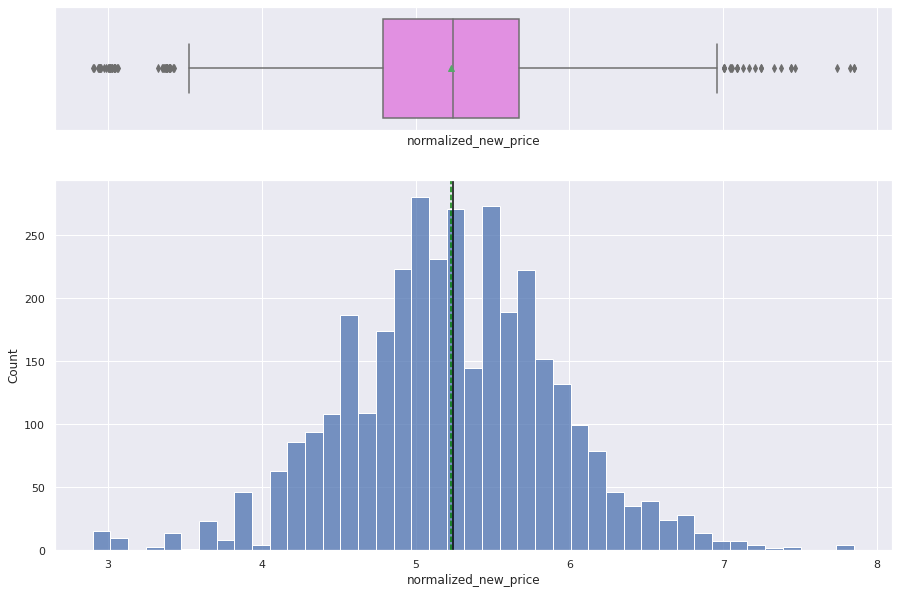

In [ ]:
histogram_boxplot(df,'normalized_new_price')

###Observation:
- The prices of used phones are kind of normally distributed

3. Screen Size of devices

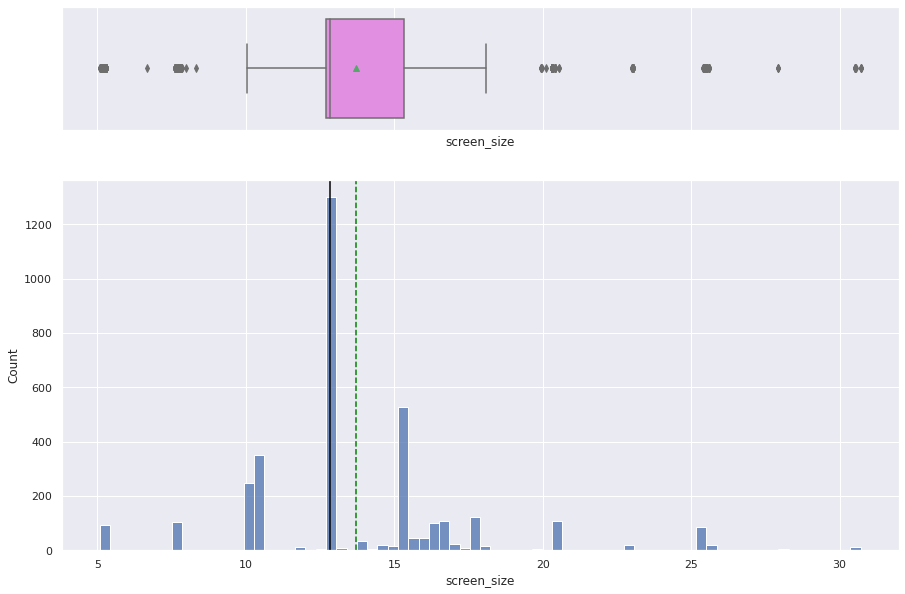

In [ ]:
histogram_boxplot(df,'screen_size')

###Observation:
- The screen sizes are approximately normally distributed

4. Main camera pixels of the devices

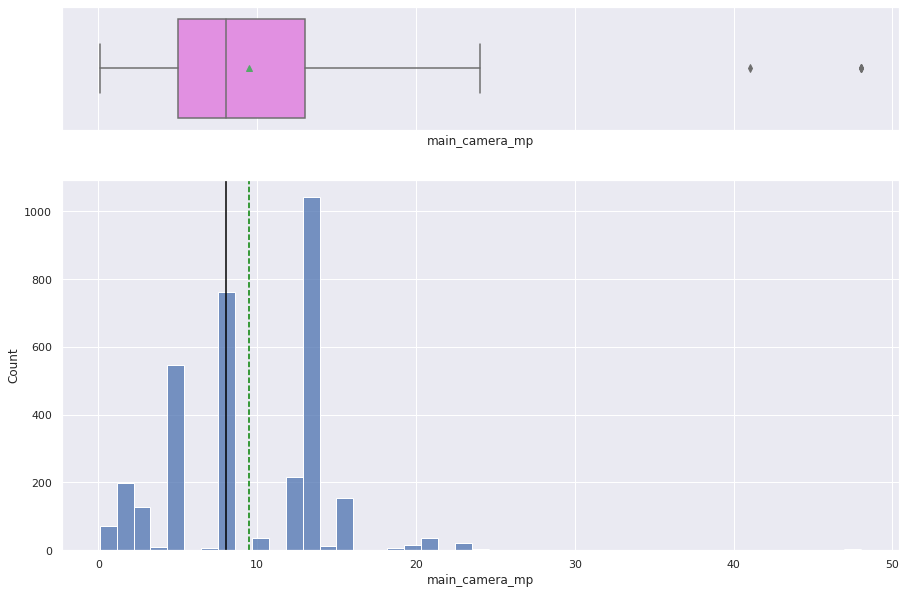

In [ ]:
histogram_boxplot(df,'main_camera_mp')

###Observations:
- The main camera pixels are kind of normally distributed

5. Selfie Camera resolution

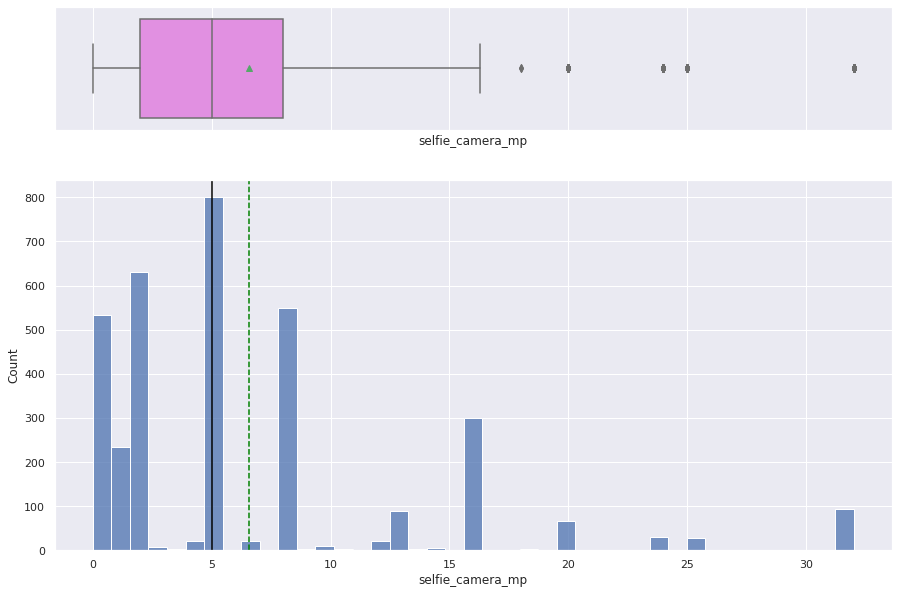

In [ ]:
histogram_boxplot(df,'selfie_camera_mp')

###Observations:
-  distribution of selfie camera pixels of the devices is right skewed

6. Amount of internal memory (ROM) in GB

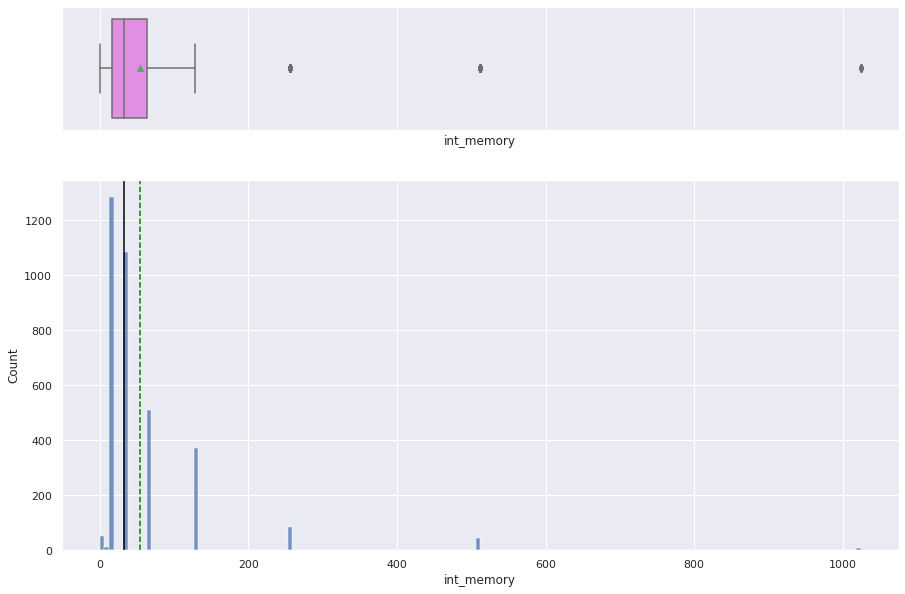

In [ ]:
histogram_boxplot(df,'int_memory')

### Observation: 
- Amount of internal memory (ROM) in GB is kind of right skewed.

7. Weight of the devices

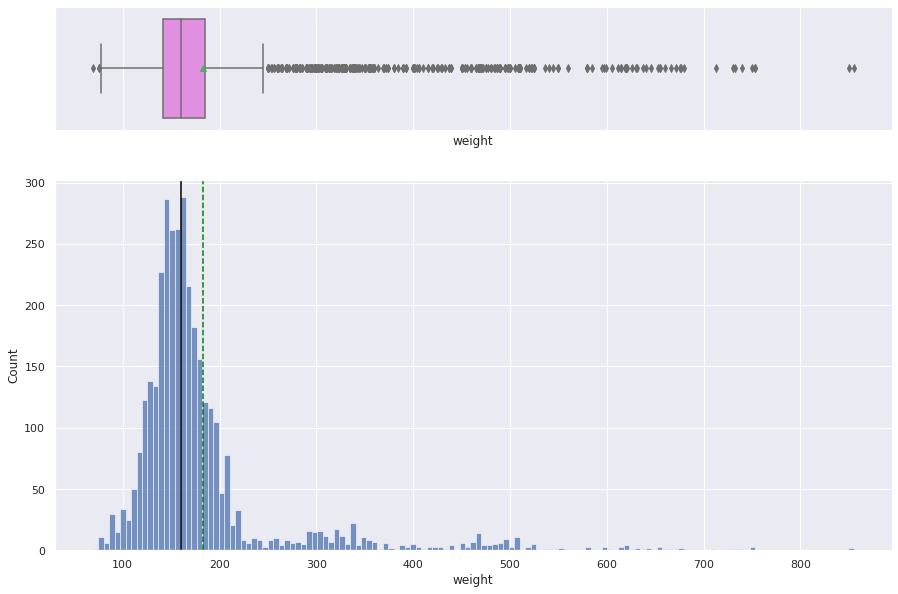

In [ ]:
histogram_boxplot(df,'weight')

### Observations:
- The weight column heavily right skewed.
- During data preporocessing for model building, I will perform a log transformation on this column to reduce the skewness

8. Battery

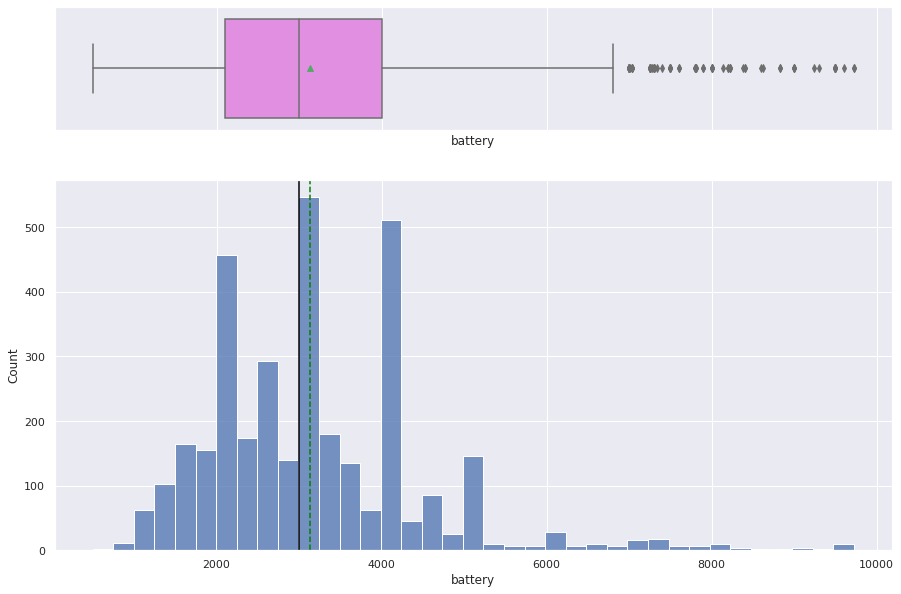

In [ ]:
histogram_boxplot(df,'battery')

### Observations:
- There is right-skewness in the battery column

9. Days used

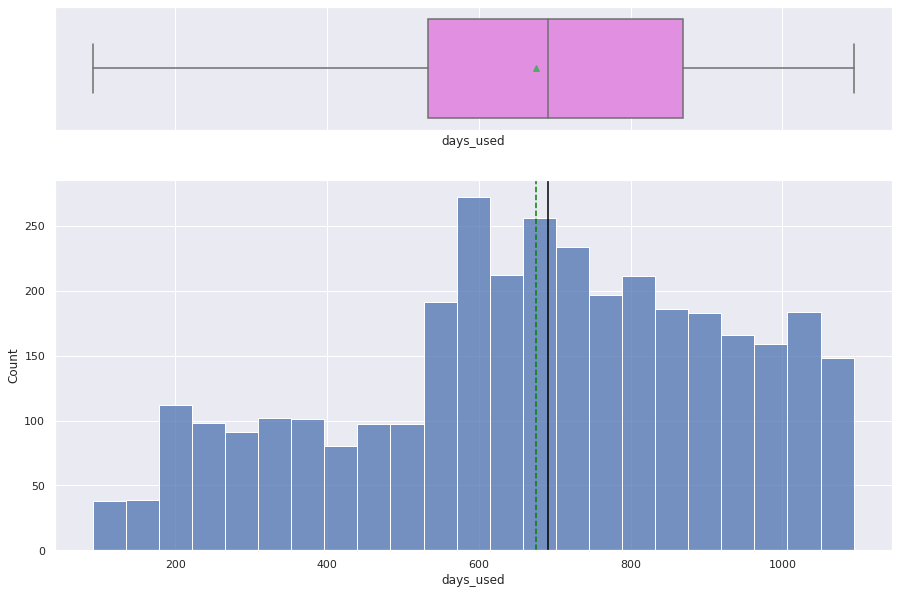

In [ ]:
histogram_boxplot(df,'days_used')

###Observation:
- The days used are approximately normally distributed

10. Brand name

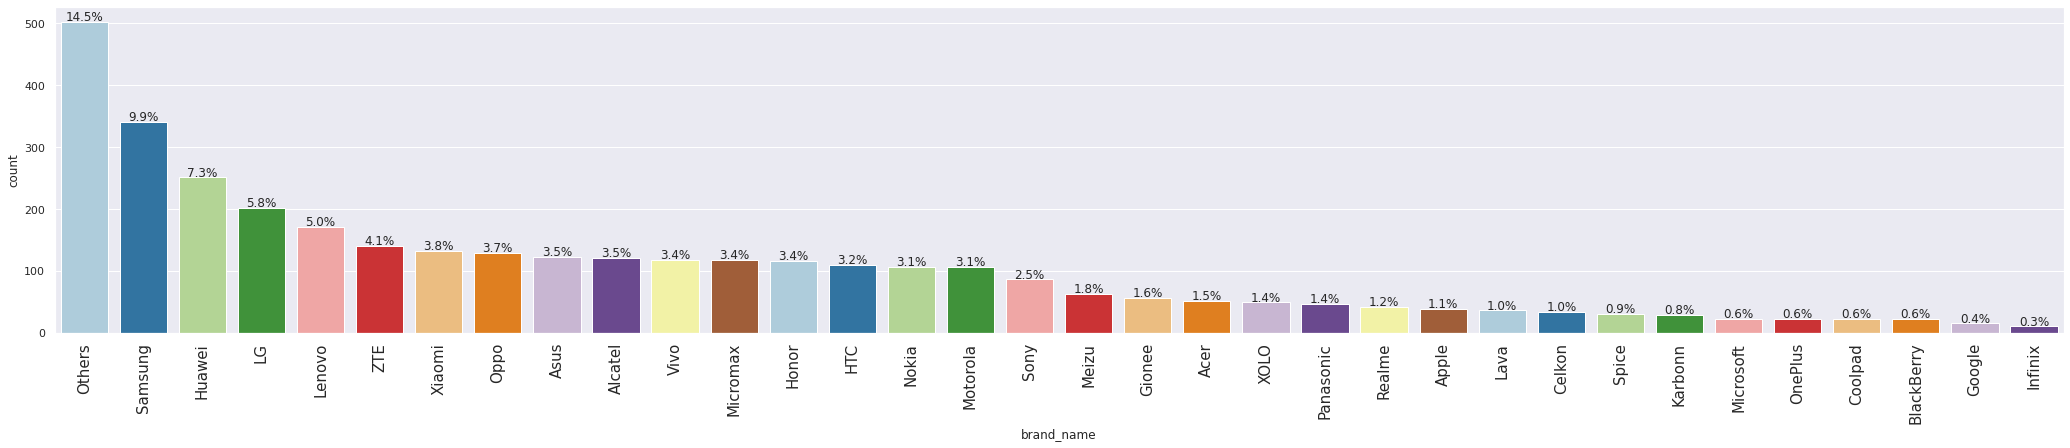

In [ ]:
labeled_barplot(df, "brand_name", perc=True)

### Observations:
- Most of the brand names were not given and they fall under the category of others
- Samsung have a higher percentage compared to others. This means customers mostly buy refurbished samsung phones.

11. Operating System

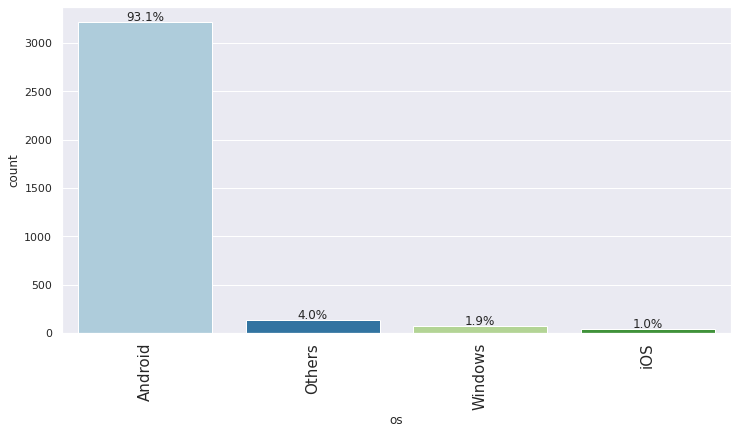

In [ ]:
labeled_barplot(df, "os", perc=True, n=10)

###Observations:
- Android devices are the most refurbished ones with a percentage of 93.1 in the Refurbished market
- iOS devices are the least refurbished ones with a percentage of 1.0% in the refurbished market

12. 4G and 5G devices

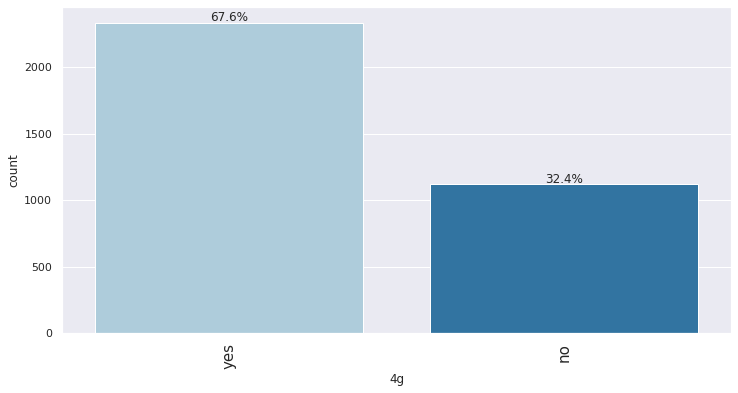

In [ ]:
labeled_barplot(df, "4g", perc=True, n=10)

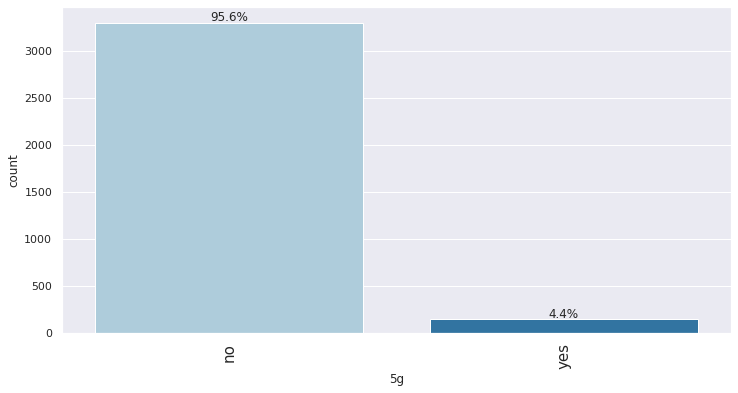

In [ ]:
labeled_barplot(df, "5g", perc=True, n=10)

### Observations:
- Alot of 4G devices were refurbished as compared to 5G

13. Release Year

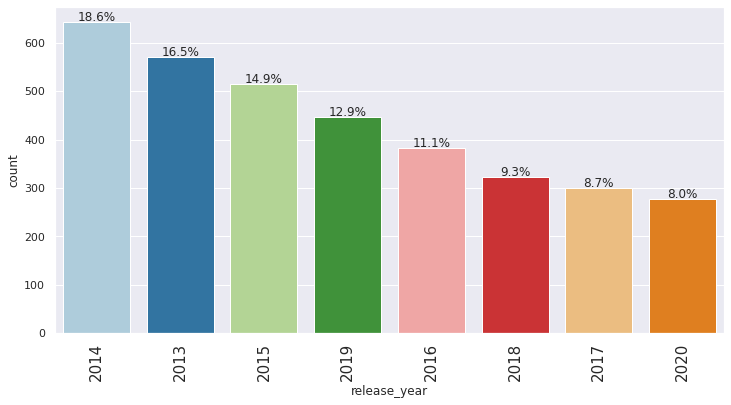

In [ ]:
labeled_barplot(df, "release_year", perc=True, n=10)

###Observations:
- Devices released in 2014 were the most refurbished ones

14. Memory

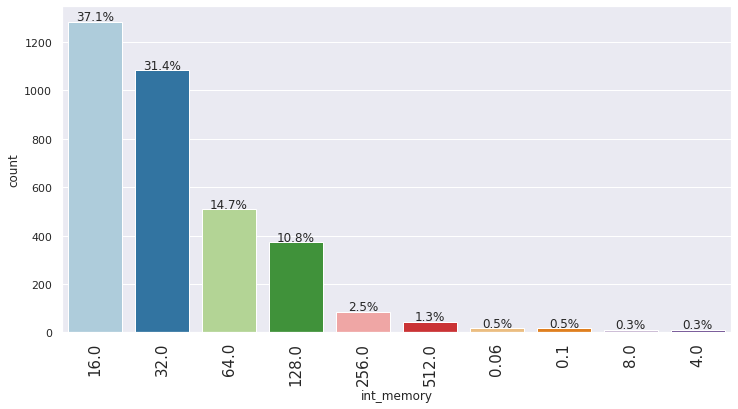

In [ ]:
labeled_barplot(df, "int_memory", perc=True, n=10)

###Observations:
- 16GB memory devices were the most refurbished ones

15. Main camera

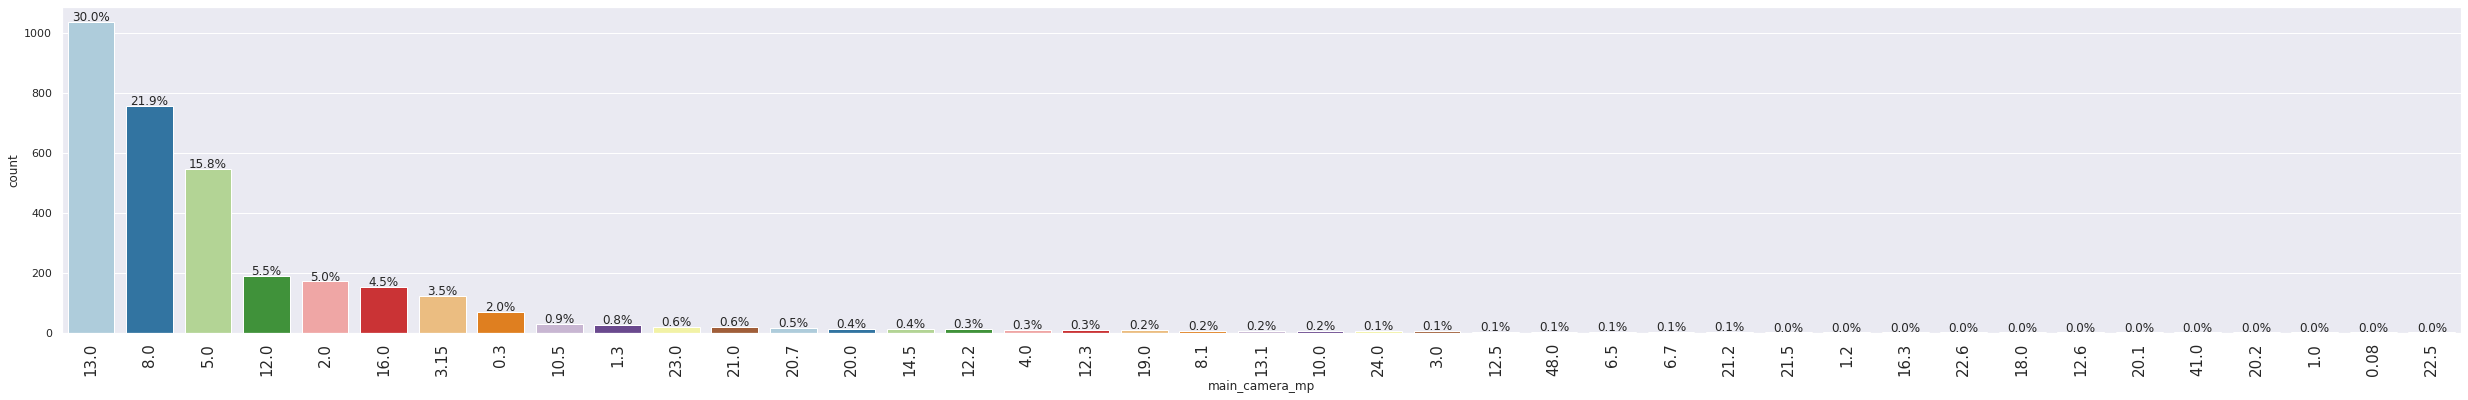

In [ ]:
labeled_barplot(df, "main_camera_mp", perc=True)

###Observations:
- 13mp main camera devices were the most refurbished ones
- When mp increases # of referbished devices increases (direct proportion).

16. Selfie Camera

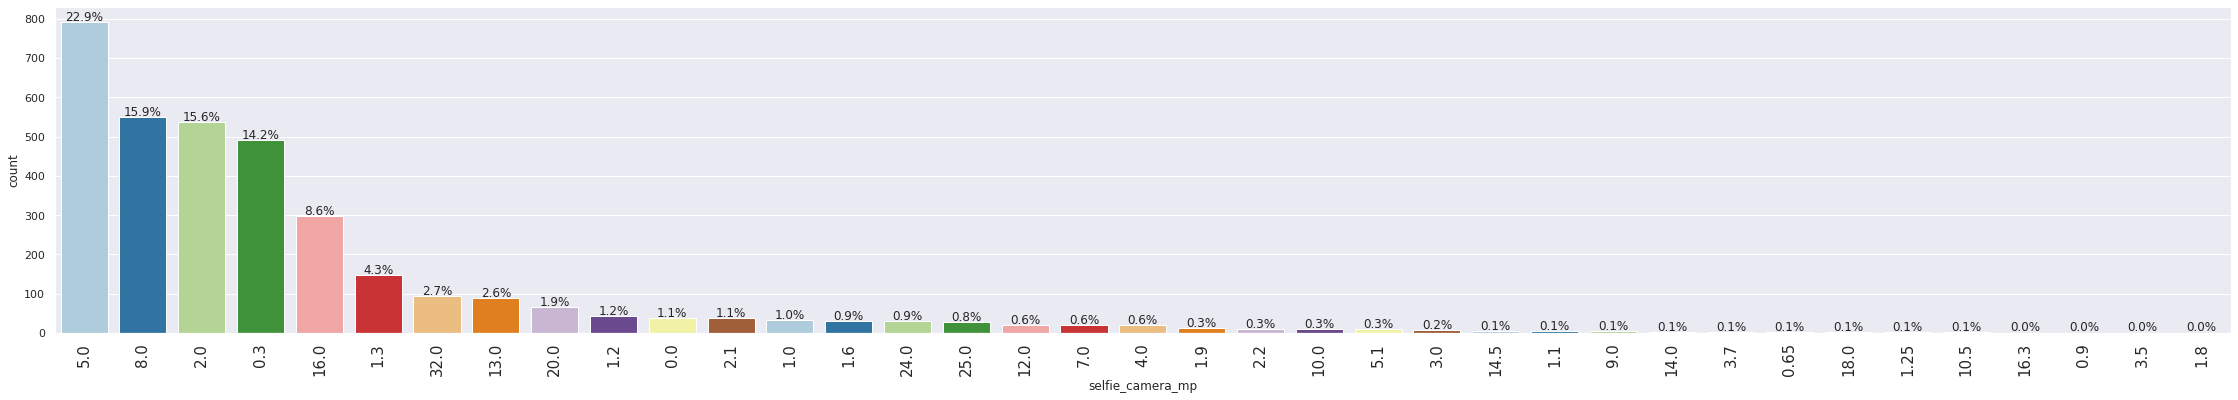

In [ ]:
labeled_barplot(df, "selfie_camera_mp", perc=True)

###Observations:
- 5mp Selfie camera devices were the most refurbished ones
- When mp increases # of referbished devices increases (direct proportion).

### Bivariate Analysis

**Correlation Check**

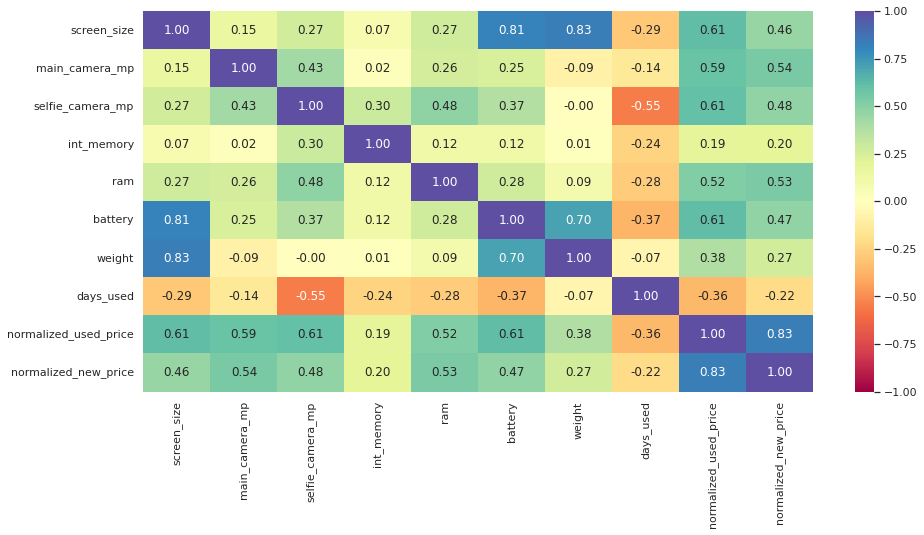

In [ ]:
# creating a list of numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("release_year")  # dropping the release_year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
);
plt.show()

###Observations:
- Battery and Screen_size are highly correlated
- Weight and screen size are highly correlated
- normalized_new_price and normalized_used_price also show high correlation
- There is a negative correlation between days_used and selfie_camera
- There is a negative correlation between days_used and normalized_used_price

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

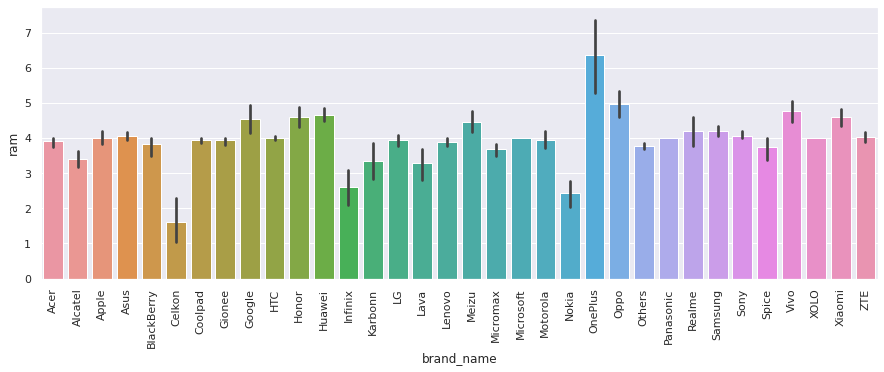

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

### Observation:
- OnePlus brand gives more RAM to the devices

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

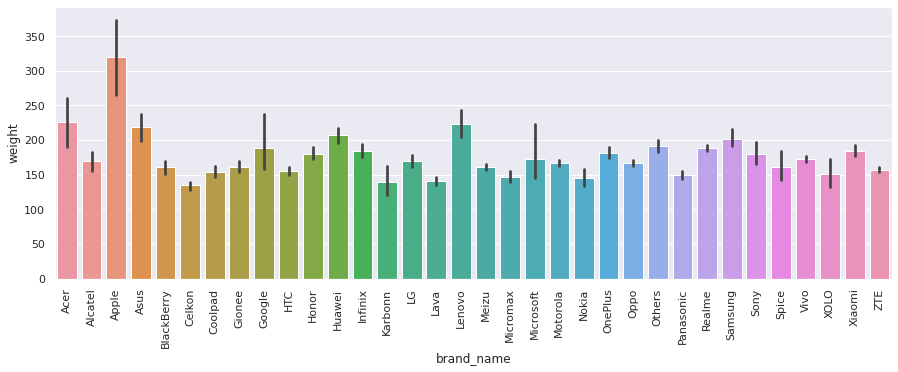

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x='brand_name', y= 'weight')
plt.xticks(rotation=90)
plt.show()

### Observation:
- Apple brand have more weight to the devices

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

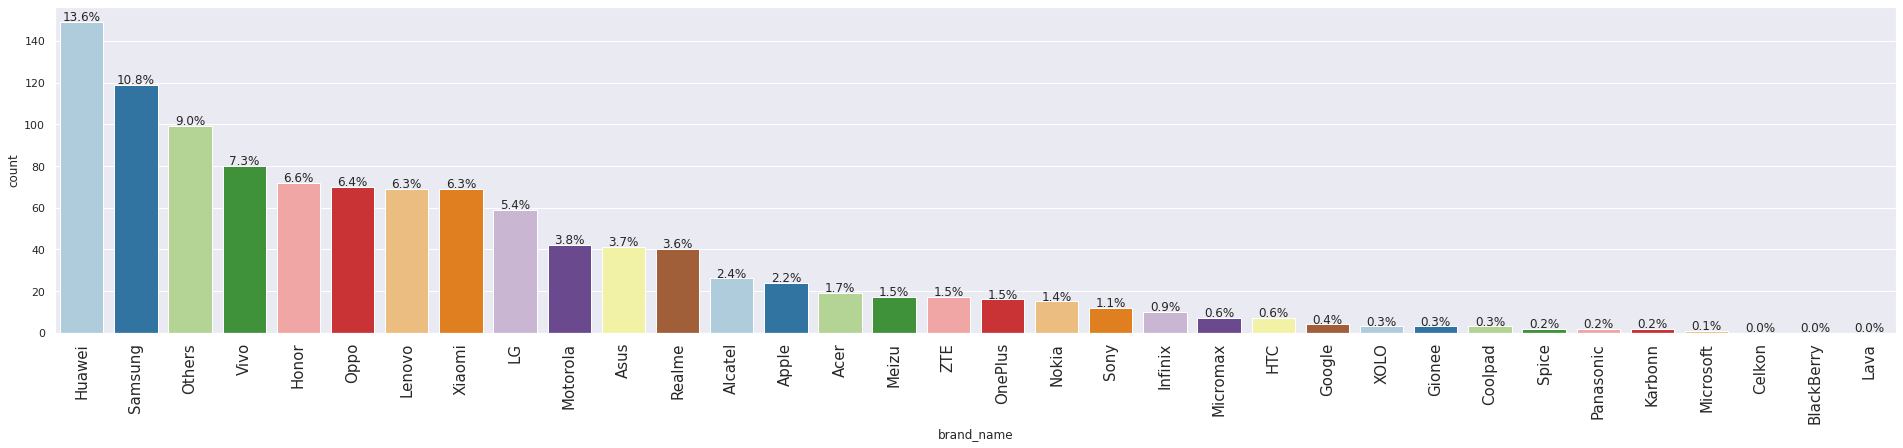

In [ ]:
labeled_barplot(df_large_screen, 'brand_name', perc=True) 

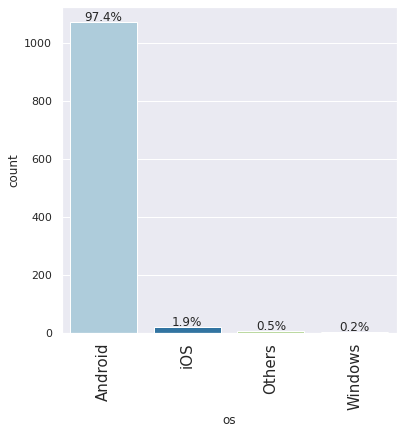

In [ ]:
labeled_barplot(df_large_screen, "os", perc=True);

###Observations:
- Huawei brand name has the highest percentage of devices with a screen size larger than 6 inches
- Android offer a large screen > 6 inches size for most of their devices as seen from the bar plot above

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

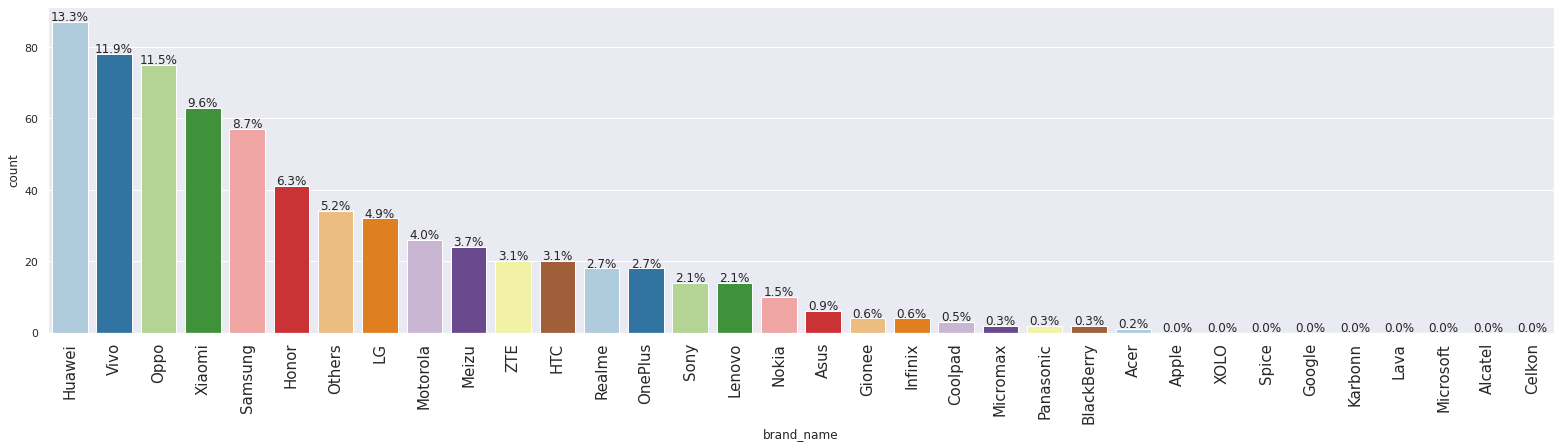

In [ ]:
labeled_barplot(df_selfie_camera, 'brand_name', perc=True) ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

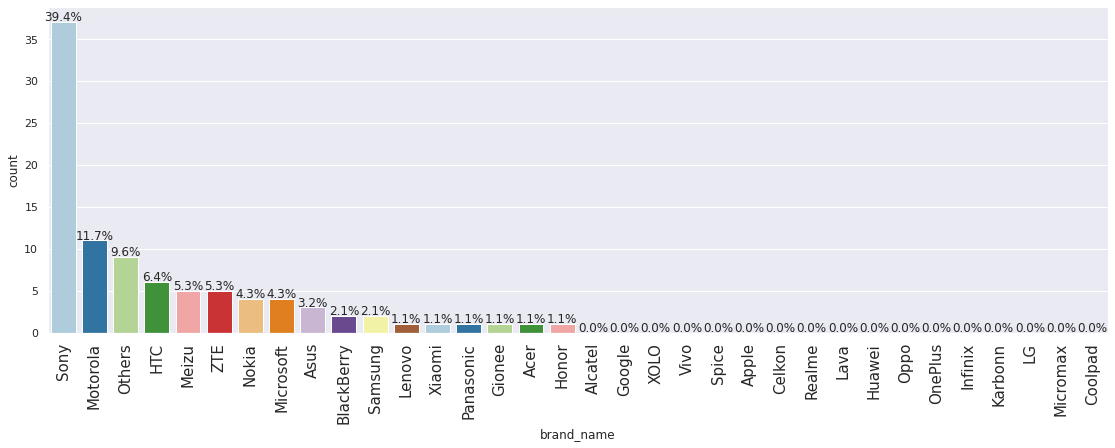

In [ ]:
labeled_barplot(df_main_camera, 'brand_name',perc=True) ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

###Observations:
- Huawei brand name has the highest percentage of devices with selfie camera mp larger than 8 MP
- Sony offers  best main cameras more than 16 MP for most of their devices as seen from the bar plot above.

**Let's see how the price of used devices varies across the years.**

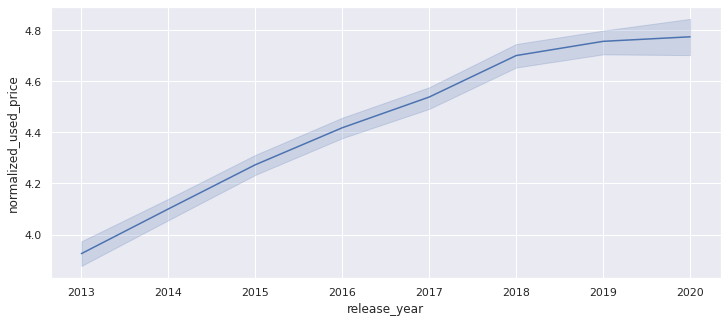

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='release_year', y='normalized_used_price') ## Complete the code to create a lineplot for release year and used price
plt.show()

###Observations:
- The price of refurbished phones keeps increasing over years. The newer the release year the higher the price

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

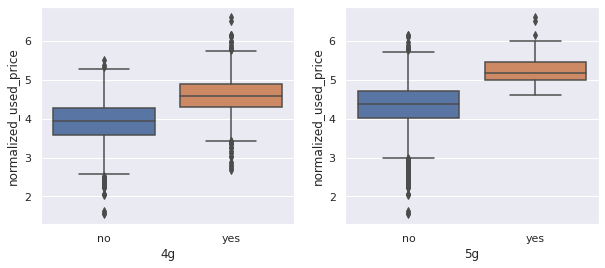

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

###Observations:
- The normalized used price of refurbished phones are increasing if they have features of 4G or 5G.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

 Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [ ]:
# let's create a copy of the data
df1 = df.copy()

In [ ]:
# checking for missing values
df1.isnull().sum() 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### Observations:
* There are still have missing values missng values.
* Let us impute these missing values with median of the columns grouped by just brand name

In [ ]:
cols_to_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_to_impute:
    df1[col] = df1.groupby([ "brand_name", "release_year"])[col].transform(
        lambda x: x.fillna(x.median())
    ) 
# checking for missing values
df1.isnull().sum() 

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Observations:
* Great!!! We have no more missing values

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Observations:
* Great!!! We have no more missing values

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median) ## Complete the code to impute the data with median

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Observations:
* Great!!! We have no more missing values

## Log Transformation

In [ ]:
# perform log transformation on the weight column and create a new column called *weight_log*
df1["weight_log"] = np.log(df1["weight"])
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


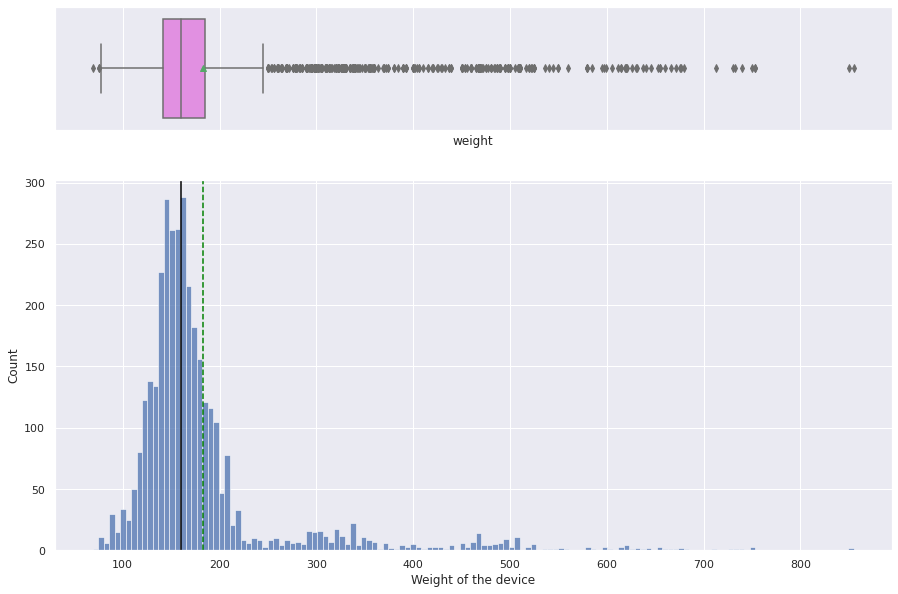

In [ ]:
# weight column distribution before log transformation
histogram_boxplot(data,"weight")
plt.xlabel("Weight of the device");

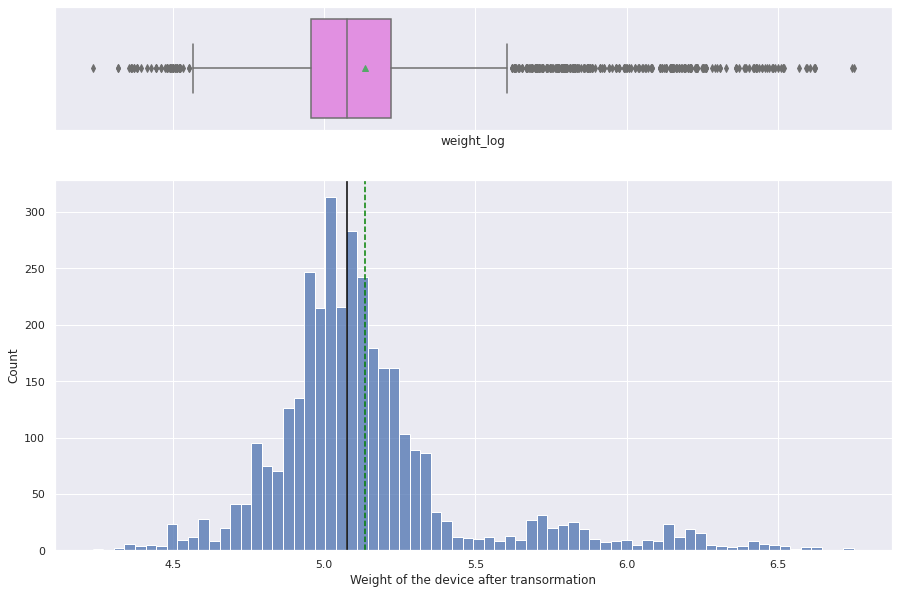

In [ ]:
# weight column distribution after log transformation
histogram_boxplot(df1,"weight_log")
plt.xlabel("Weight of the device after transormation");

###Observations:
- The weight column distribution after log transformation behaves better as compared to before
- We will go ahead and drop the weight column and leave the weight_log column

In [ ]:
# drop weight column
df1.drop(["weight"], axis=1, inplace=True)

KeyError: ignored

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Outlier Check

- Let's check for outliers in the data.

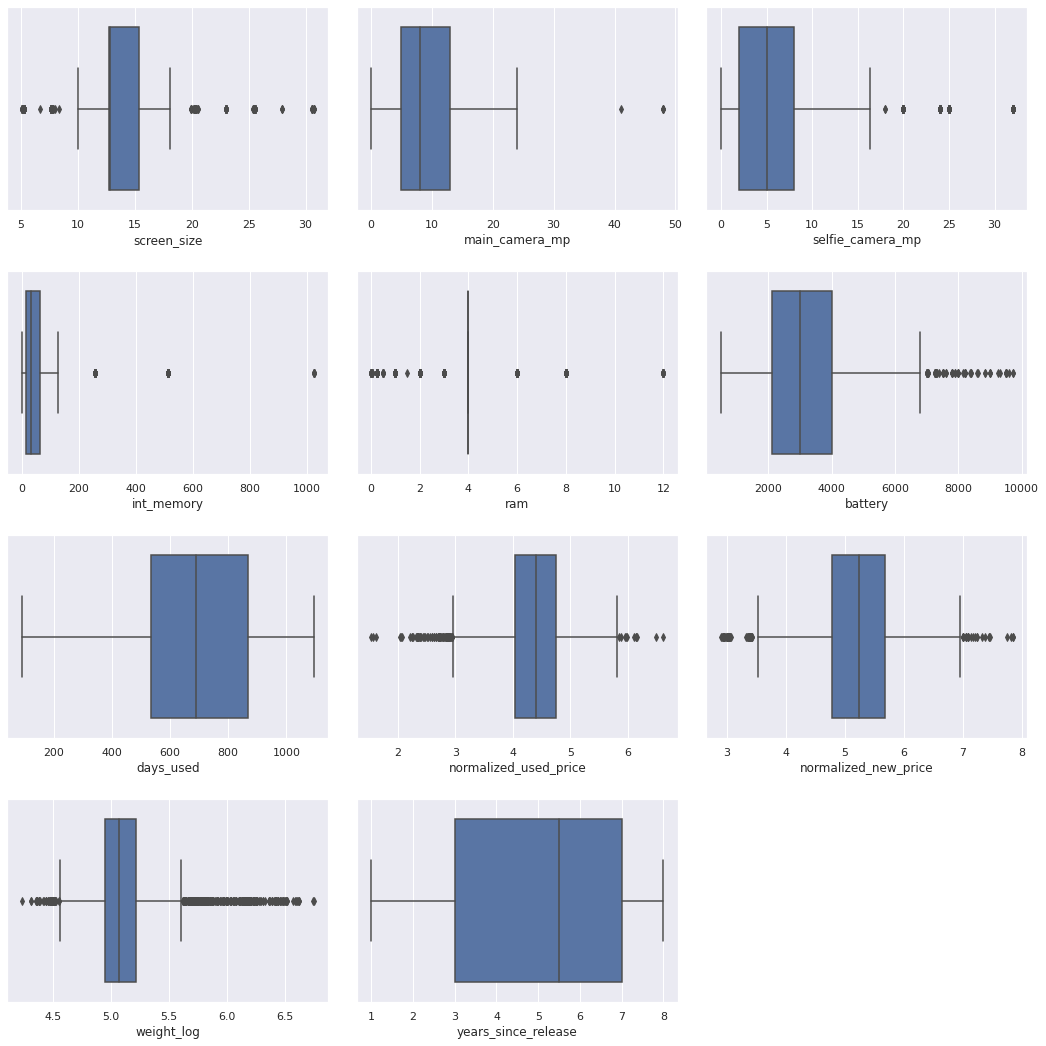

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
# list of columns to treat for outliers
treat_out_cols = ["weight_log", "normalized_new_price", "battery", 
                  "int_memory", "selfie_camera_mp", "main_camera_mp", "screen_size"] 

- P.S. We will not treat outliers in the ram column as doing so will remove the variation in the column and most likely make it a constant, which is not desirable, and so it is omitted in the list of columns to treat.

In [ ]:
# create a new data frame after treating outliers in the colums
df2 = treat_outliers_all(df1, treat_out_cols)

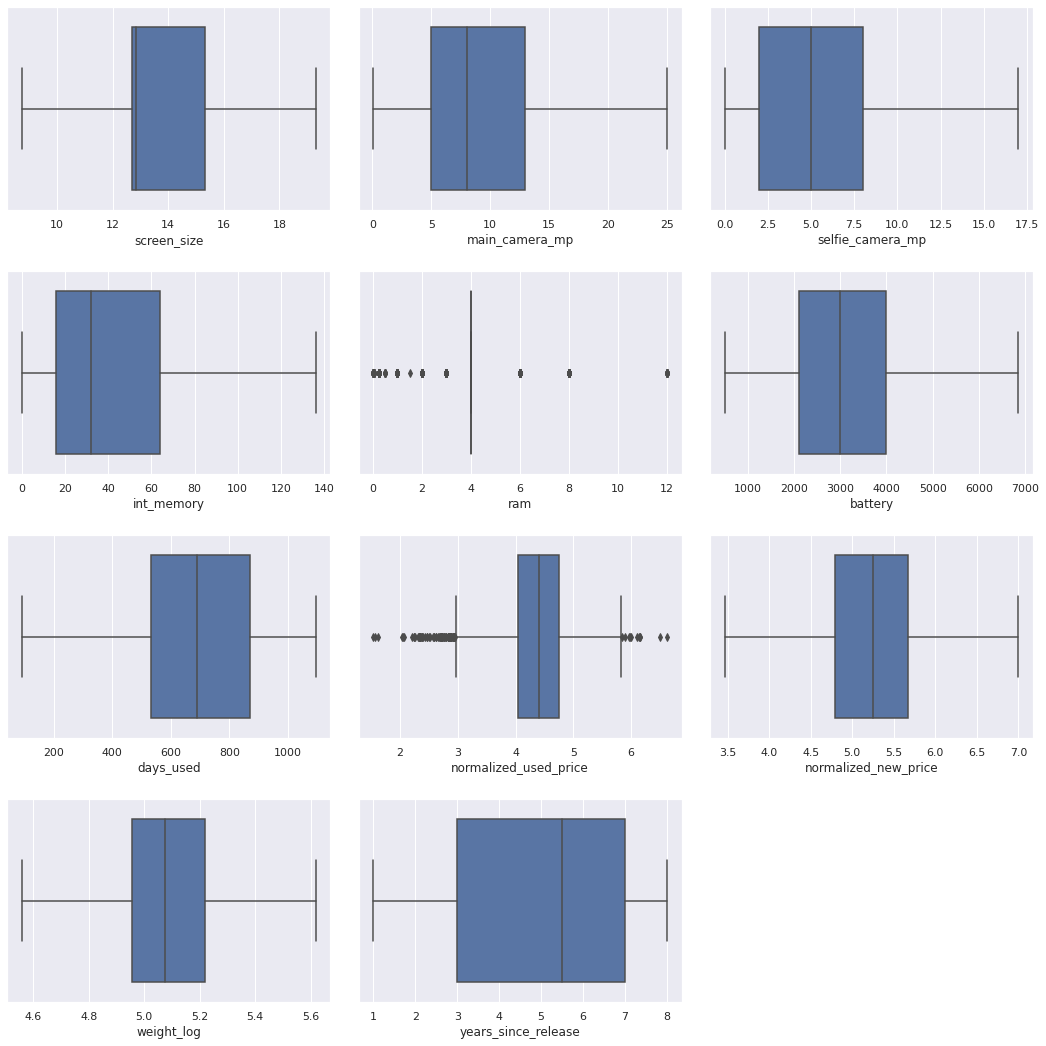

In [ ]:
# outlier detection using boxplot
num_cols = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
# check the statistical summary once again
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.425356,4.532445,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.726459,39.070439,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.037238,1.365132,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3108.710046,1212.900792,500.0,2100.0,3000.0,4000.0,6850.0


In [ ]:
# check df2 has no missing values as required
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
years_since_release      0
dtype: int64

In [ ]:
# take a look at how df2 data looks like now
df2.head()


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,weight_log,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,4.983607,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,5.361292,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,5.361292,1
3,Honor,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,345,5.135387,5.630961,5.617149,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,5.220356,1


In [ ]:
df2["brand_name"].nunique()

34

Before preparing data for modeling, Let us go ahead and drop the brand_name column as explained before.

- This column has very many categories(34) which means after creating dummies, very many columns will be formed
- This information in the brand name column can be grouped int os which column we already have and with fewer unique values
- Hence, let us go ahead and drop it


In [ ]:
df2.drop(["brand_name"], axis=1, inplace=True) # drop brand_name column
df2.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,weight_log,years_since_release
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,4.983607,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,5.361292,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,5.361292,1
3,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,345,5.135387,5.630961,5.617149,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,5.220356,1


- brand_name column dropped.

In [ ]:
df2.dtypes

os                       category
screen_size               float64
4g                       category
5g                       category
main_camera_mp            float64
selfie_camera_mp          float64
int_memory                float64
ram                       float64
battery                   float64
days_used                   int64
normalized_used_price     float64
normalized_new_price      float64
weight_log                float64
years_since_release         int64
dtype: object

####Observation:
- All outliers in the independent columns were treated apart from the ram column.

## Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

## Split Data

In [ ]:
## Complete the code to define the dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        19.30  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  days_used  normalized_new_price  weight_log  \
0        64.0  3.0   3020.0        127              4.715100    4.983607   
1       128.0  8.0   4300.0        325              5.519018    5.361292   
2       128.0  8.0   4200.0        162              5.884631    5.361292   
3        64.0  6.0   6850.0        345              5.630961    5.617149   
4        64.0  3.0   5000.0        293              4.947837    5.220356   

   years_since_release  
0                    1  
1                    1  
2                    1  
3               

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_new_price,weight_log,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,127,4.715100,4.983607,1,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,325,5.519018,5.361292,1,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,162,5.884631,5.361292,1,0,0,0,1,1
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,345,5.630961,5.617149,1,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,293,4.947837,5.220356,1,0,0,0,1,0


In [ ]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [ ]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1) ## Complete the code to split the data into train and test in specified ratio

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [ ]:
print(X_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  days_used  normalized_new_price  weight_log  \
3026   1800.0        819              4.796204    4.787492   
1525   4050.0        585              5.434595    5.416100   
1128   2550.0        727              5.137914    5.087596   
3003   3200.0        800              5.189228    5.030438   
2907   2900.0        560              5.016220    5.075174   

      years_since_release  os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
3026                    7          0           0       0       0       0  
15

In [ ]:
print(X_test.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
866     1.0        15.24            8.00               2.0        16.0  4.00   
957     1.0        10.16            3.15               0.3       136.0  0.25   
280     1.0        15.39            8.00               8.0        32.0  2.00   
2150    1.0        12.83           13.00              16.0        64.0  4.00   
93      1.0        15.29           13.00               5.0        32.0  3.00   

      battery  days_used  normalized_new_price  weight_log  \
866    3000.0        632              5.190788    5.327876   
957    1400.0        637              3.884652    4.941642   
280    5000.0        329              4.487287    5.220356   
2150   3200.0        648              5.639422    4.997212   
93     3500.0        216              5.300415    5.187386   

      years_since_release  os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
866                     7          0           0       0       0       

## Model Building - Linear Regression

In [ ]:
olsmodel1 = sm.OLS(y_train, X_train).fit() ## Complete the code to fit OLS model
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     812.5
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           04:31:41   Log-Likelihood:                 52.315
No. Observations:                   2417   AIC:                            -72.63
Df Residuals:                       2401   BIC:                             20.01
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

###Observation:
- Adjusted R-Squared is equal 0.834, which is good
- The y-intercept is equal to the value of the const coeffiecient which is -0.0729
- The coefficients of the different predictor variables is well listed in the model summary forexample;
- The coefficient of normalized_new_price is equal to 0.4116

## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, X_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23679,0.183305,0.835427,0.83433,4.415689


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, X_test, y_test) ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24349,0.187718,0.835623,0.833045,4.587383


###Observations:
- The training R-squared
 is 0.835, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict the price of a used device within a mean error of 0.187 on the test data.

- MAPE of 4.58 on the test data means that we are able to predict within 4.6% of the used device prices.



## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.


We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### 1. TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,1231.286145
1,screen_size,5.027900
2,main_camera_mp,2.126621
3,selfie_camera_mp,3.620955
4,int_memory,2.151427
5,ram,2.035234
6,battery,3.489302
7,days_used,2.589642
8,normalized_new_price,2.850145
9,weight_log,4.306794


####Observations:
- If VIF is between 1 and 5, then there is low multicollinearity.
- If VIF is between 5 and 10, we say there is moderate multicollinearity.
- If VIF is exceeding 10, it shows signs of high multicollinearity.

- -  Therefore: - screen_size and years_since_release show moderate collinearity Let us go ahead and treat the multicollinearity

### Removing Multicollinearity (if needed)

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = [
    "screen_size",
    "years_since_release"
]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.834006,0.237858
1,screen_size,0.826766,0.242991


- Dropping screen_size will have the maximum impact on the predictive power of the model as compared to years_since_release.
- Therefore we'll drop years_since_release and check the VIF again.

In [ ]:
col_to_drop = "years_since_release"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,1231.253873
1,screen_size,4.958095
2,main_camera_mp,2.120053
3,selfie_camera_mp,3.106976
4,int_memory,2.106590
5,ram,2.032073
6,battery,3.411409
7,days_used,1.867384
8,normalized_new_price,2.544070
9,weight_log,4.293370


- Dropping years_since_release has brought the VIF of screen_size below 5.
- Hence the above predictors have no multicollinearity and the assumption is satisfied
- Let us check the model summary again

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     868.1
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           04:44:02   Log-Likelihood:                 48.954
No. Observations:                   2417   AIC:                            -67.91
Df Residuals:                       2402   BIC:                             18.95
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

####Observations:
- We can see that adj. R-squared has not changed at all, which shows that the dropped column did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.


###Dropping high p-value variables
- const, battery, days_used, os_Windows, os_iOS and 5g_yes have p-value > 0.05. So, they are not significant and we'll drop them all one at a time except the constant.

In [ ]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'normalized_new_price', 'weight_log', 'os_Others', '4g_yes']


In [ ]:
x_train3 = x_train2[["const"] + selected_features]
x_test3 = x_test2[["const"] + selected_features]

In [ ]:
# print model summary
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     1351.
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           04:46:32   Log-Likelihood:                 47.333
No. Observations:                   2417   AIC:                            -74.67
Df Residuals:                       2407   BIC:                            -16.76
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

####Observations:
- Now adjusted R-squared is 0.834, i.e., our model is able to explain ~83% of the variance. This shows that the model is good.
- The adjusted R-squared in olsmodel (where we considered all the variables) was 0.834. This shows that the variables we dropped were not affecting the model much.

### 2. TEST FOR LINEARITY AND INDEPENDENCE

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.798366,0.289122
1525,4.448399,4.674778,-0.226379
1128,4.315353,4.312318,0.003034
3003,4.282068,4.255363,0.026706
2907,4.456438,4.499773,-0.043335


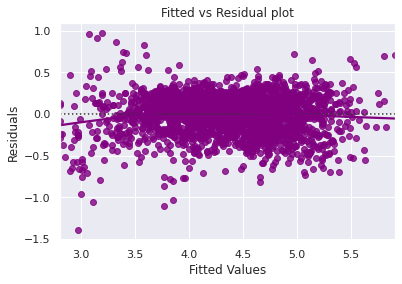

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
- There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### 3. TEST FOR NORMALITY

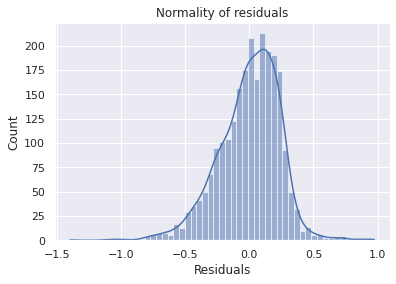

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

####Observations:
- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

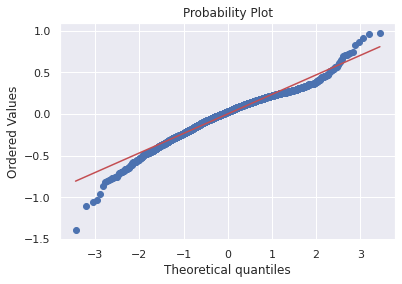

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

###Observations:
- The residuals more or less follow a straight line except for the tails.
- Let's us see the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9722211956977844, pvalue=2.9548442444042685e-21)

### Observations:
- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

### 4. TEST FOR HOMOSCEDASTICITY

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0395309013372214), ('p-value', 0.25113021221959175)]

### Observations:
- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

###### Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.401259
2341,3.696103,3.945032
1913,3.592093,3.715532
688,4.306495,4.146192
650,4.522115,5.122795
2291,4.259294,4.404318
40,4.997685,5.309307
1884,3.875359,4.069883
2538,4.206631,3.975904
45,5.380450,5.403881


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph for a sample of 25 records

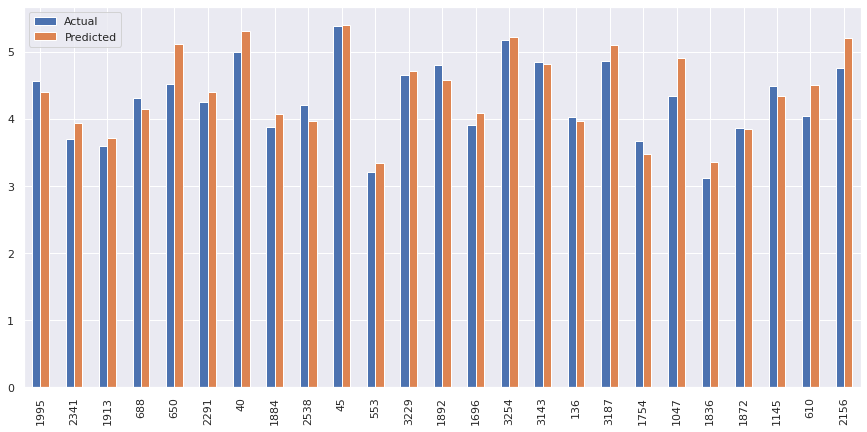

In [ ]:
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()

## Final Model

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     1351.
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           04:52:58   Log-Likelihood:                 47.333
No. Observations:                   2417   AIC:                            -74.67
Df Residuals:                       2407   BIC:                            -16.76
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237278,0.183551,0.834747,0.83406,4.424209


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244741,0.188709,0.833929,0.832311,4.619579


##Summary:
- The model is able to explain ~83% of the variation in the data, which is very good.

- The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

- The Mean Absolute Percentage Error(MAPE) on the test set suggests we can predict the used devices prices within 4.6% error which is good because it is a low value

- Hence, we can conclude the model olsmod2 is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations 

1. There is a strong positive correlation between the price of a new device and its corresponding refurbished device. This means that as the price of a new device increases, so does the price of the same device in the refurbished market.

2. An increase of 1 unit in the weight of a device results in a price increase of 0.2612 euros for the refurbished device.

3. The following factors have positive coefficients and significantly influence the price of used devices: screen size, main camera megapixels, selfie camera megapixels, internal memory, RAM, normalized new price, logarithm of weight, and 4G capability. As these factors increase, so does the price of used devices.

4. Devices with operating systems other than Android, iOS, and Windows have negative coefficients, meaning that as the prevalence of these devices increases, the price of used devices decreases.

####To summarize, the factors that have a significant impact on the price of refurbished devices in the market are: screen size, main camera megapixels, selfie camera megapixels, internal memory, RAM, normalized new price, logarithm of weight, 4G capability, and operating system.

###Recommendations:
Retailers typically perform checks and repairs on used phones to meet certain standards for the refurbished market. Therefore, factors such as the number of days the device has been used, battery health, and years since release of the device do not have a significant impact on the price of the refurbished device. This means that Recell does not need to worry excessively about these factors. As long as the device is repaired and meets the required standards, it should be marketable.

___